In [6]:
import pandas as pd
import geopandas as gpd
import os

In [4]:
# .shp => shapefile (very common geo format)
path = gpd.datasets.get_path("naturalearth_lowres")
path

'/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [7]:
# dir that contains the shapefile
# "shapefile" is actually a collection of files
os.listdir("/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres")

['naturalearth_lowres.shx',
 'naturalearth_lowres.shp',
 'naturalearth_lowres.dbf',
 'naturalearth_lowres.cpg',
 'naturalearth_lowres.prj']

In [8]:
os.listdir("/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/")

['naturalearth_cities',
 'nybb_16a.zip',
 'naturalearth_lowres',
 '__pycache__',
 'naturalearth_creation.py',
 '__init__.py']

In [17]:
df = gpd.read_file(path).set_index("name")
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [19]:
type(df).__mro__ # method resolution order

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [20]:
df["geometry"]

name
Fiji                        MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
Tanzania                    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
W. Sahara                   POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
Canada                      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
United States of America    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                                                  ...                        
Serbia                      POLYGON ((18.82982 45.90887, 18.82984 45.90888...
Montenegro                  POLYGON ((20.07070 42.58863, 19.80161 42.50009...
Kosovo                      POLYGON ((20.59025 41.85541, 20.52295 42.21787...
Trinidad and Tobago         POLYGON ((-61.68000 10.76000, -61.10500 10.890...
S. Sudan                    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

<class 'shapely.geometry.polygon.Polygon'>


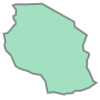

In [23]:
print(type(df["geometry"].iat[1]))
df["geometry"].iat[1]

<class 'shapely.geometry.multipolygon.MultiPolygon'>


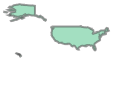

In [24]:
print(type(df["geometry"].at["United States of America"]))
df["geometry"].at["United States of America"]

In [26]:
type(df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

In [38]:
df["colorname"] = "lightgray"
df.loc[df["pop_est"] > 1e8, "colorname"] = "red" # >100 mil
df.head(3)

,pop_est,continent,iso_a3,gdp_md_est,geometry,colorname
name,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",lightgray
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",lightgray
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",lightgray


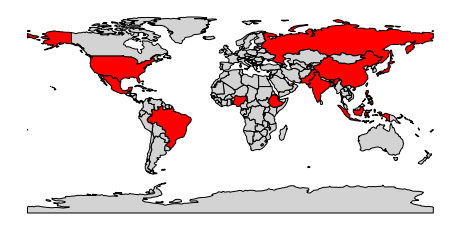

In [39]:
ax = df.plot(figsize=(8,8), color=df["colorname"], edgecolor="black")
ax.set_axis_off()

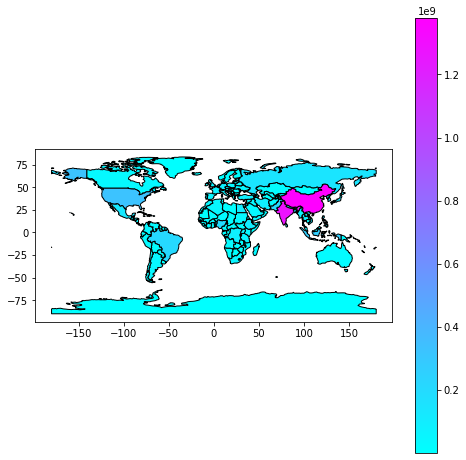

In [43]:
ax = df.plot(figsize=(8,8), column="pop_est",
             edgecolor="black", cmap="cool", legend=True)

# Shapes from Scratch

In [44]:
from shapely.geometry import Polygon, box, Point

<class 'shapely.geometry.polygon.Polygon'>


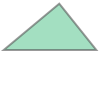

In [47]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])
print(type(p1))
p1

<class 'shapely.geometry.polygon.Polygon'>


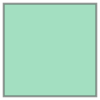

In [49]:
p2 = box(0,0,1,1)
print(type(p2))
p2

<class 'shapely.geometry.point.Point'>


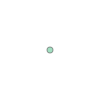

In [51]:
p3 = Point(5,5)
print(type(p3))
p3

<class 'shapely.geometry.polygon.Polygon'>


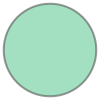

In [53]:
p4 = p3.buffer(1)
print(type(p4))
p4

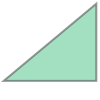

In [54]:
p1.intersection(p2) # AND

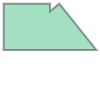

In [55]:
p1.union(p2) # OR

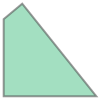

In [56]:
p1.difference(p2) # subtraction

In [57]:
p1.intersects(p2)

True

In [58]:
p1.intersects(p3)

False

False


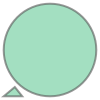

In [66]:
nearby_p3 = p3.buffer(5)
print(p1.intersects(nearby_p3))
p1.union(nearby_p3)

<AxesSubplot:>

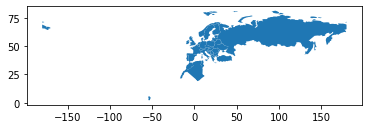

In [69]:
eur_window = box(-10.67, 34.5, 31.55, 71.06)
df[df.intersects(eur_window)].plot()

<AxesSubplot:>

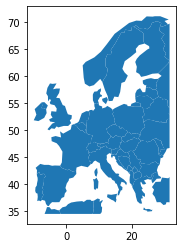

In [76]:
europe1 = df.intersection(eur_window)
europe1 = europe1[~europe1.is_empty]
europe1.plot()

/tmp/ipykernel_192028/550175523.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe1.centroid.plot(ax=area, color="red")


<AxesSubplot:>

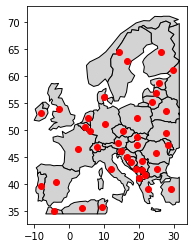

In [79]:
area = europe1.plot(color="lightgray", edgecolor="black")
europe1.centroid.plot(ax=area, color="red")

In [80]:
europe1.crs # coordinate reference system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

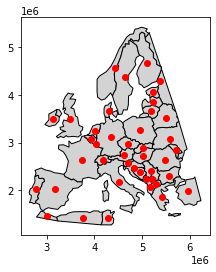

In [89]:
europe2 = europe1.to_crs("EPSG:3035")
area = europe2.plot(color="lightgray", edgecolor="black")
europe2.centroid.plot(ax=area, color="red")
#europe1.centroid.to_crs("EPSG:3035").plot(ax=area, color="blue")